<a href="https://colab.research.google.com/github/SaurabhVaze/airline-delays/blob/main/Project_2_Part_3_Explanatory_Viz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Set 1 (Project 2 Dataset)

In [2]:
airlines = pd.read_csv('/content/airdf.csv') #import data

In [3]:
airlines

,Unnamed: 0,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,2,3,AA,2400,LAX,DFW,3,20,165,1
1,3,4,AA,2466,SFO,DFW,3,20,195,1
2,13,14,AA,2408,LAX,DFW,3,55,170,0
3,228,229,AA,2301,ORD,DFW,3,360,150,1
4,230,231,AA,526,SFO,DFW,3,360,215,0
...,...,...,...,...,...,...,...,...,...,...
11019,539271,539272,UA,787,SFO,SAN,5,1357,91,0
11020,539272,539273,UA,455,SFO,LAS,5,1359,94,0
11021,539280,539281,OO,6344,LAX,SAN,5,1360,54,0
11022,539287,539288,UA,927,SFO,LAX,5,1361,88,0


1) Source of data

https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay

2) Brief description of data

Dataset of different US flights used to predict whether a flight gets delayed or not.

3) What is the target?

Flight Delayed? (Y/N)

4) Is this a classification or regression problem?

This will be a classification problem 

5) How many features?

7

6) How many rows of data.

11024

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this

The lack of numerical features may limit the model's ability to predict accurately, along with a multitude of other factors that play into flight delays, which are not included in this dataset (weather, travel demand, etc.)

#Data Cleaning 

In [4]:
airlines = airlines.drop(['id', 'Flight'], axis = 1) #drop unneeded columns

In [5]:
airlines = airlines.drop(['Unnamed: 0'], axis = 1) #drop unneeded columns

Drop id and Flight number columns, as they provide no benefit in training a model to predict delays

In [6]:
airlines.isna().sum() #check missing values

Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

**no missing values**

In [7]:
airlines.duplicated().sum()   #check for duplicated rows

4507

**many duplicated rows**

In [8]:
airlines = airlines.drop_duplicates() #drop duplicated rows

In [9]:
airlines.duplicated().sum()   #check for duplicated rows

0

**duplicates removed**

In [10]:
dtypes = airlines.dtypes                           #find any irregularities in the entries within columns of object datatype
strings = dtypes[dtypes == 'object'].index

for c in strings:
  print(f'Column = {c}')
  print(airlines[c].value_counts(dropna = False))
  print('\n\n')

Column = Airline
UA    2327
WN    1272
AA    1256
DL     891
OO     771
Name: Airline, dtype: int64



Column = AirportFrom
LAX    1747
SFO    1369
DEN    1263
ORD    1211
ATL     927
Name: AirportFrom, dtype: int64



Column = AirportTo
LAX    1469
LAS    1338
SFO    1298
DFW    1269
SAN    1143
Name: AirportTo, dtype: int64





**no irregular labels of objects**

In [11]:
airlines.describe()

,DayOfWeek,Time,Length,Delay
count,6517.000000,6517.000000,6517.000000,6517.000000
mean,3.978518,830.233696,151.681602,0.513580
std,1.959339,290.999598,80.971562,0.499854
min,1.000000,20.000000,45.000000,0.000000
25%,2.000000,585.000000,85.000000,0.000000
50%,4.000000,814.000000,145.000000,1.000000
75%,6.000000,1085.000000,202.000000,1.000000
max,7.000000,1369.000000,335.000000,1.000000


**the data seems well distributed but min time of 20 seems unreasonably low**

In [12]:
airlines = airlines[airlines['Time'] != 20] #drop row

drop row that has Time = 20

In [13]:
airlines.describe()

,DayOfWeek,Time,Length,Delay
count,6488.000000,6488.000000,6488.000000,6488.000000
mean,3.977343,833.855271,151.557337,0.513409
std,1.959340,286.550934,81.125010,0.499859
min,1.000000,55.000000,45.000000,0.000000
25%,2.000000,585.000000,85.000000,0.000000
50%,4.000000,820.000000,137.000000,1.000000
75%,6.000000,1085.000000,205.000000,1.000000
max,7.000000,1369.000000,335.000000,1.000000


**55 is also likely too low**

drop row that has Time = 55

In [14]:
airlines = airlines[airlines['Time'] != 55]
airlines.describe()

,DayOfWeek,Time,Length,Delay
count,6473.000000,6473.000000,6473.000000,6473.000000
mean,3.976827,835.660127,151.515372,0.513363
std,1.959042,284.416155,81.214254,0.499860
min,1.000000,353.000000,45.000000,0.000000
25%,2.000000,585.000000,85.000000,0.000000
50%,4.000000,820.000000,135.000000,1.000000
75%,6.000000,1085.000000,205.000000,1.000000
max,7.000000,1369.000000,335.000000,1.000000


**No remaining outliers**

#Exploratory Viz

Text(0.5, 1.0, 'Univariate Distribution of Flight Lengths')

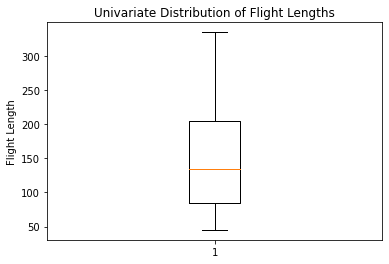

In [15]:
plt.boxplot(x='Length', data = airlines) #univariate boxplot of flight lengths
plt.ylabel('Flight Length')
plt.title('Univariate Distribution of Flight Lengths')


Text(0.5, 1.0, 'Count Distribution of Flight Times')

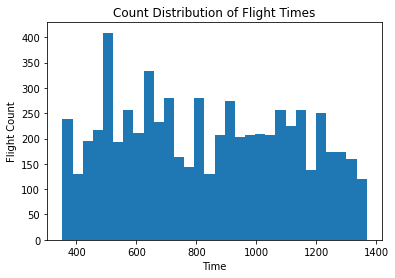

In [16]:
plt.hist('Time', data = airlines, bins = 30) #univariate plot of Time feature
plt.xlabel('Time')
plt.ylabel('Flight Count')
plt.title('Count Distribution of Flight Times')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Flight Count')

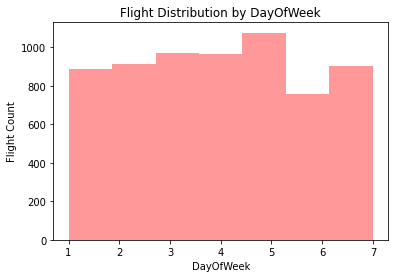

In [17]:
sns.distplot(airlines['DayOfWeek'], bins = 7, kde = False, color = 'red').set(title = 'Flight Distribution by DayOfWeek') #flight DOW distribution
plt.ylabel('Flight Count')

Text(0.5, 1.0, 'Flight On-Time Count')

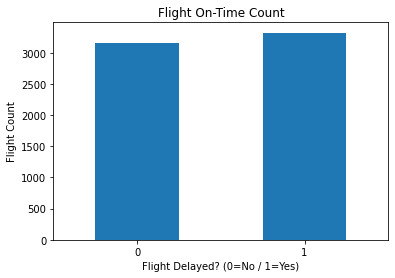

In [18]:
airlines.groupby('Delay').size().plot.bar(rot=0) #target: how many flights were on-time?
plt.xlabel('Flight Delayed? (0=No / 1=Yes)')
plt.ylabel('Flight Count')
plt.title('Flight On-Time Count')

Text(0.5, 1.0, 'Airline Count')

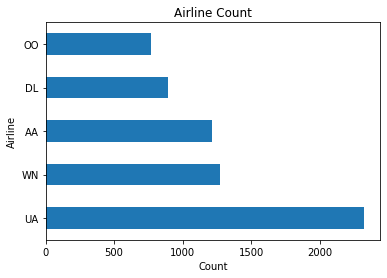

In [19]:
airlines['Airline'].value_counts().plot(kind='barh') #univariate plot of Airline count
plt.xlabel("Count")
plt.ylabel("Airline")
plt.title('Airline Count')

Text(0.5, 1.0, 'Departure Airport Count')

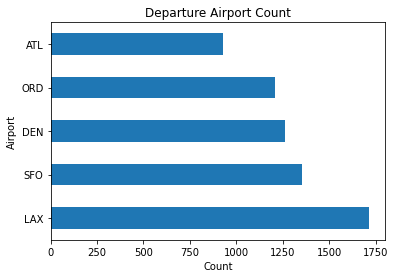

In [20]:
airlines['AirportFrom'].value_counts().plot(kind='barh') #univariate plot of airport count
plt.xlabel("Count")
plt.ylabel("Airport")
plt.title('Departure Airport Count')

Text(0.5, 1.0, 'Arrival Airport Count')

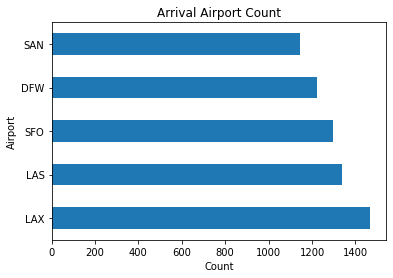

In [21]:
airlines['AirportTo'].value_counts().plot(kind='barh') #univariate plot of airport count
plt.xlabel("Count")
plt.ylabel("Airport")
plt.title('Arrival Airport Count')

#Explanatory Viz

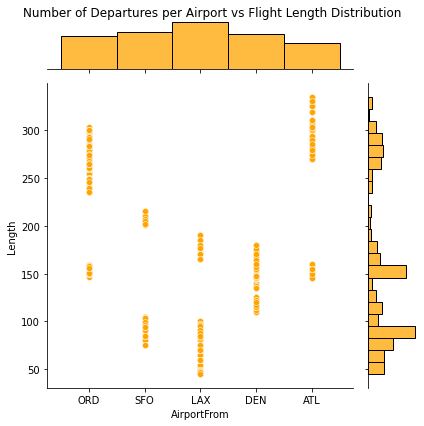

In [35]:
p=sns.jointplot(x = 'AirportFrom', y = 'Length', data = airlines, color = 'orange')
p.fig.suptitle('Number of Departures per Airport vs Flight Length Distribution')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

This visual gives an interesting cross section of both airport popularity, along with the profile of flights that are common from each city. The bulk of all flights in this dataset look to be under 150 minutes.

We can also see that LAX has the greatest count of departing flights in this dataset, with the majority of the flights being relatively short, under 100mins. On the other end of the spectrum, ATL has the lowest count of flights, but the longest average flight times. Although SFO looks to have the least visible variance in its departing flight lengths, it represents the 2nd most flown departure airport in the study.

Text(0.5, 0.98, 'Length of Delayed/On-Time Flights by Day of Week')

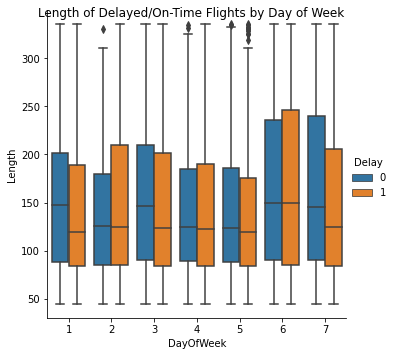

In [51]:
c=sns.catplot(x="DayOfWeek", y="Length", hue="Delay", kind="box", data=airlines)
c.fig.suptitle('Length of Delayed/On-Time Flights by Day of Week')


In general, there appears to be very minimal to no correlation here between flight length and Delay status, but there is definite variability in the types of flights that depart on different days of the week. At first glace, it is clear to see that Days 4 and 5 have the smallest IQR, while having the greatest number of outliers with a small number of very long flights. Days 6 and 7 have the most variance in flight length, and also have for the most part the highest mean flight lengths across all days.
